# *3일차*
# 회귀분석

### 목표변수 FAT을 예측하기 위한 새로운 파생변수(BMI 등)를 생성하여 회귀분석을 실시하고 결과를 해석하라.(BMI 계산 시, WEIGHT는 파운드(1lb -> 0.45kg), HEIGHT는 인치(1inch -> 2.54cm)이므로 변환하여 사용)

데이터 : 체질검사.csv(변수 : 14개, 자료 수 : 252개)

---
---
## 패키지 불러오기

In [205]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import scale
%matplotlib inline

---
---
## 데이터 불러오기

In [206]:
df_FAT = pd.read_csv("체질검사.csv",engine = "python")
df_FAT.head(10)

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4
5,24.2,40,202.25,70.00,38.5,106.5,100.9,106.2,63.5,39.9,22.6,35.1,30.6,19.0
6,23.3,52,167.00,67.75,37.5,102.7,91.0,98.9,57.1,36.7,22.3,31.6,27.5,17.9
7,26.0,54,230.00,72.25,42.5,119.9,110.4,105.5,64.2,42.7,27.0,38.4,32.0,19.6
8,9.0,47,184.25,74.50,37.3,99.6,88.8,101.4,57.4,39.6,24.6,30.3,27.9,17.8
9,4.0,47,127.50,66.75,34.0,83.4,70.4,87.2,50.6,34.4,21.9,26.8,25.8,16.8


---
---
## 데이터 확인

In [207]:
df_FAT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 14 columns):
FAT        252 non-null float64
AGE        252 non-null int64
WEIGHT     252 non-null float64
HEIGHT     252 non-null float64
NECK       252 non-null float64
CHEST      252 non-null float64
ABDOMEN    252 non-null float64
HIP        252 non-null float64
THIGH      252 non-null float64
KNEE       252 non-null float64
ANKLE      252 non-null float64
BICEPS     252 non-null float64
FOREARM    252 non-null float64
WRIST      252 non-null float64
dtypes: float64(13), int64(1)
memory usage: 27.6 KB


**☞_DataFrame 형태로 저장되어 있고, 데이터의 레코드 수는 252개, 컬럼은 14개가 존재한다. AGE는 int형 자료, 다른 변수들은 float형 자료로 구성되어 있다.**

---
---
## 결측치 확인

In [208]:
df_FAT.isnull().sum()

FAT        0
AGE        0
WEIGHT     0
HEIGHT     0
NECK       0
CHEST      0
ABDOMEN    0
HIP        0
THIGH      0
KNEE       0
ANKLE      0
BICEPS     0
FOREARM    0
WRIST      0
dtype: int64

**☞_결측치 확인 결과, 결측치가 없는 것으로 확인되었다.**

---
---
## 데이터 변환 (WEIGHT, HEIGHT)

몸무게는 kg, 키는 cm가 보기 편하므로 데이터를 변환한다.

WEIGHT(kg) = WEIGHT(lbs) * 0.45

HEIGHT(cm) = HEIGHT(inch) * 2.54

In [209]:
df = df_FAT.copy()

In [210]:
df["WEIGHT"] = df_FAT["WEIGHT"]*0.45
df["WEIGHT"] = df["WEIGHT"].round(1)
df.head(10)

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,163.4,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,75.6,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,80.0,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,66.5,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,98.6,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4
5,24.2,40,91.0,70.00,38.5,106.5,100.9,106.2,63.5,39.9,22.6,35.1,30.6,19.0
6,23.3,52,75.2,67.75,37.5,102.7,91.0,98.9,57.1,36.7,22.3,31.6,27.5,17.9
7,26.0,54,103.5,72.25,42.5,119.9,110.4,105.5,64.2,42.7,27.0,38.4,32.0,19.6
8,9.0,47,82.9,74.50,37.3,99.6,88.8,101.4,57.4,39.6,24.6,30.3,27.9,17.8
9,4.0,47,57.4,66.75,34.0,83.4,70.4,87.2,50.6,34.4,21.9,26.8,25.8,16.8


In [211]:
df["HEIGHT"] = df_FAT["HEIGHT"]*2.54
df["HEIGHT"] = df["HEIGHT"].round(1)
df.head(10)

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,163.4,183.5,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,75.6,181.0,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,80.0,174.0,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,66.5,167.0,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,98.6,162.6,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4
5,24.2,40,91.0,177.8,38.5,106.5,100.9,106.2,63.5,39.9,22.6,35.1,30.6,19.0
6,23.3,52,75.2,172.1,37.5,102.7,91.0,98.9,57.1,36.7,22.3,31.6,27.5,17.9
7,26.0,54,103.5,183.5,42.5,119.9,110.4,105.5,64.2,42.7,27.0,38.4,32.0,19.6
8,9.0,47,82.9,189.2,37.3,99.6,88.8,101.4,57.4,39.6,24.6,30.3,27.9,17.8
9,4.0,47,57.4,169.5,34.0,83.4,70.4,87.2,50.6,34.4,21.9,26.8,25.8,16.8


---
---
## 이상치 확인

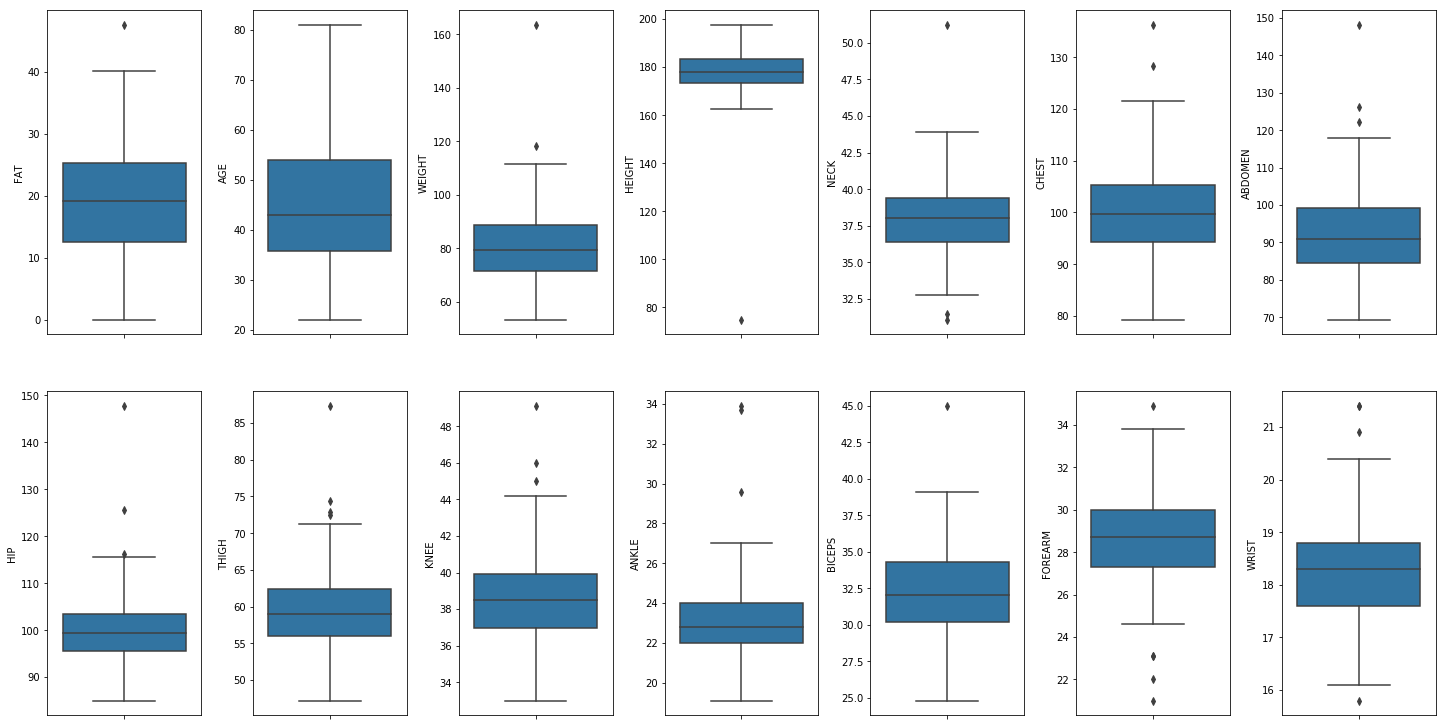

In [212]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [213]:
df_filtered = df[(df.FAT > 41) | (df.FAT < 3) | (df.WEIGHT > 118) | (df.HEIGHT < 160) | (df.NECK < 32.5) 
                 | (df.NECK > 50) | (df.CHEST > 125) | (df.ABDOMEN > 120) | (df.HIP > 116) | (df.THIGH > 72) 
                 | (df.KNEE > 44.5) | (df.ANKLE > 28) | (df.BICEPS > 40) | (df.FOREARM > 34) 
                 | (df.FOREARM < 24) | (df.WRIST > 20.5) | (df.WRIST < 16)]
df_filtered

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,163.4,183.5,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
4,47.5,51,98.6,162.6,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4
21,0.0,40,53.3,172.7,33.8,79.3,69.4,85.0,47.2,33.5,20.2,27.7,24.6,16.5
31,34.3,35,102.7,176.5,40.4,114.9,115.9,111.9,74.4,40.6,24.0,36.1,31.8,18.8
33,18.0,43,74.5,174.0,31.1,93.1,87.3,96.6,54.7,39.0,24.8,31.0,29.4,18.8
35,26.6,67,75.2,171.4,36.5,98.9,89.7,96.2,54.7,37.8,33.7,32.4,27.7,18.2
48,12.5,55,56.9,169.5,33.4,88.8,78.2,87.5,50.8,33.0,19.7,25.3,22.0,15.8
51,38.1,42,109.9,193.0,41.8,115.2,113.7,112.4,68.5,45.0,25.5,37.1,31.2,19.9
73,12.5,30,61.4,174.6,35.9,88.7,76.6,89.8,50.1,34.8,21.8,27.0,34.9,16.9
78,32.9,44,92.2,74.9,36.6,106.0,104.3,115.5,70.6,42.5,23.7,33.6,28.7,17.4


**☞_사람마다 체형이 다르기 때문에 범위를 벗어났다고 이상치로만 보기에는 무리가 있다.**

**☞_몸무게가 163kg인 사람은 목 둘레, 가슴둘레, 복부둘레 등이 모두 크게 나왔기때문에 이상치로 보기 어렵다.**

**☞_키가 74cm인 사람은 전체적인 데이터를 봤을 때, 이상치로 보인다. 따라서 키가 74cm인 사람을 제외하고 분석을 실행한다.**

**☞_FAT이 3이하인 사람은 거의 살 수 없을 정도라고 한다. 따라서 FAT이 3이하인 사람을 제외하고 분석을 실행한다.**

---
---
## 이상치 제거

In [215]:
df = df[df["HEIGHT"] > 100]
df[75:80]

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
75,27.0,70,76.8,177.8,38.7,101.8,94.9,95.0,56.0,36.5,24.1,31.2,27.3,19.2
76,18.4,64,85.6,184.8,39.3,103.1,97.8,99.6,58.9,39.0,23.0,34.3,29.6,19.0
77,14.1,48,79.2,185.4,36.7,96.7,86.5,98.3,60.4,39.9,24.4,28.8,29.6,18.7
79,3.7,27,71.7,181.6,35.7,89.6,79.7,96.5,55.0,36.7,22.5,29.9,28.2,17.7
80,18.5,61,66.7,171.4,36.0,91.6,81.8,94.8,54.5,37.0,21.4,29.3,27.0,18.3


In [218]:
df = df[df["FAT"] >= 3]
df[20:25]
df[145:150]

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
147,10.8,40,60.1,171.4,33.6,88.2,73.7,88.5,53.3,34.5,22.5,27.9,26.2,17.3
148,13.6,51,67.2,177.2,34.8,92.8,81.1,96.3,53.8,36.5,21.5,31.3,26.3,17.8
149,7.5,51,69.5,177.8,36.9,93.3,81.5,94.4,54.7,39.0,22.6,27.5,25.9,18.6
151,29.3,72,84.0,167.6,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
152,17.3,43,87.3,191.8,38.5,110.1,88.7,102.1,57.5,40.0,24.8,35.1,30.7,19.2


**☞_인덱스번호가 78번인 키가 74cm인 사람의 데이터가 삭제 되었다.**

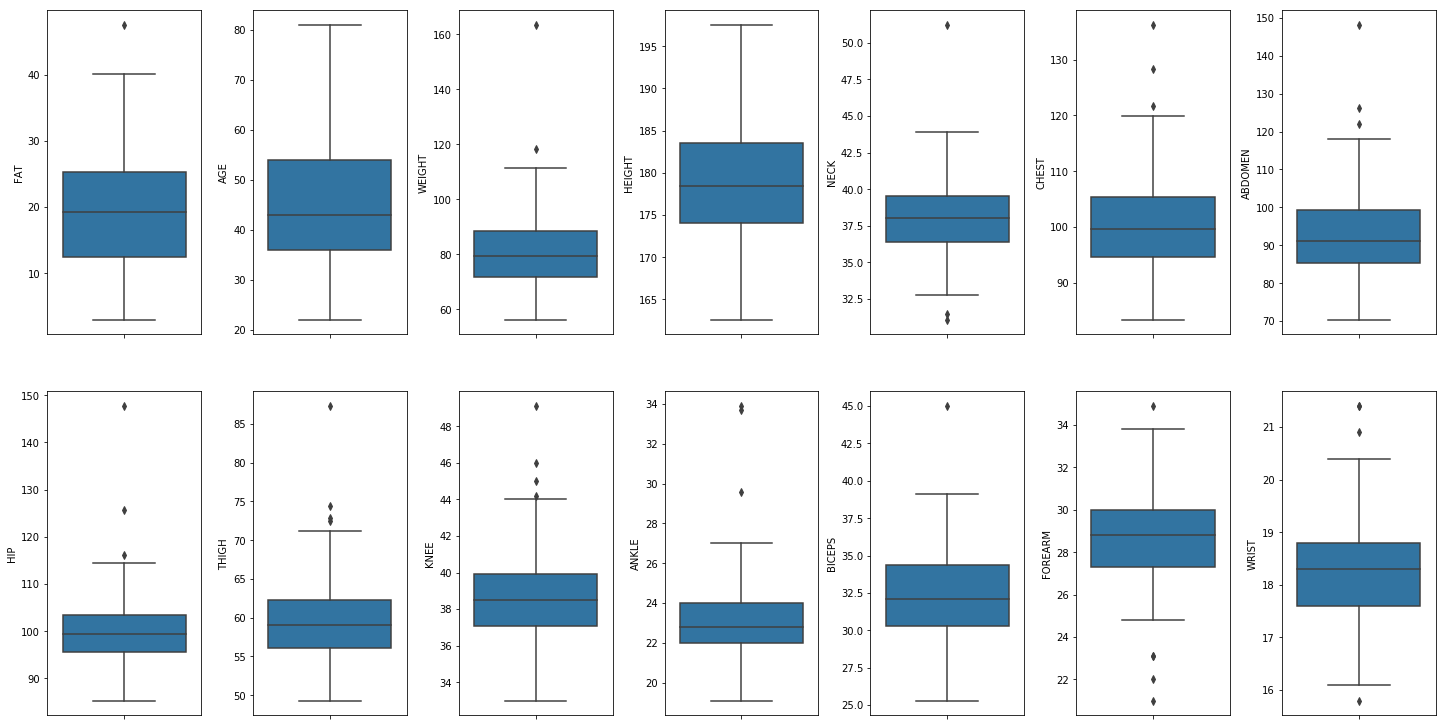

In [190]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

---
---
## 파생변수 생성

**BMI = 몸무게(kg) / (키(m) * 키(m))**

In [191]:
df["BMI"] = df["WEIGHT"] / ((df["HEIGHT"]*0.01) * (df["HEIGHT"]*0.01))
df["BMI"] = df["BMI"].round(1)

/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [192]:
df.head(10)

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,BMI
0,35.2,46,163.4,183.5,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,48.5
1,11.8,27,75.6,181.0,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8,23.1
2,22.2,69,80.0,174.0,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8,26.4
3,10.6,57,66.5,167.0,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9,23.8
4,47.5,51,98.6,162.6,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4,37.3
5,24.2,40,91.0,177.8,38.5,106.5,100.9,106.2,63.5,39.9,22.6,35.1,30.6,19.0,28.8
6,23.3,52,75.2,172.1,37.5,102.7,91.0,98.9,57.1,36.7,22.3,31.6,27.5,17.9,25.4
7,26.0,54,103.5,183.5,42.5,119.9,110.4,105.5,64.2,42.7,27.0,38.4,32.0,19.6,30.7
8,9.0,47,82.9,189.2,37.3,99.6,88.8,101.4,57.4,39.6,24.6,30.3,27.9,17.8,23.2
9,4.0,47,57.4,169.5,34.0,83.4,70.4,87.2,50.6,34.4,21.9,26.8,25.8,16.8,20.0


---
---
## 데이터 역할 지정

In [193]:
df_y = df["FAT"]
df_x = df.drop("FAT",axis = 1, inplace = False)

In [194]:
print("목표변수 데이터 크기 : {}".format(df_y.shape))
print("설명변수 데이터 크기 : {}".format(df_x.shape))

목표변수 데이터 크기 : (249,)
설명변수 데이터 크기 : (249, 14)


---
---
## 절편 추가

In [195]:
df_x_const = sm.add_constant(df_x)
df_x_const.head()

,const,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,BMI
0,1.0,46,163.4,183.5,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,48.5
1,1.0,27,75.6,181.0,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8,23.1
2,1.0,69,80.0,174.0,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8,26.4
3,1.0,57,66.5,167.0,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9,23.8
4,1.0,51,98.6,162.6,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4,37.3


---
---
## 변수 간의 경향성 파악 - 그래프 분석

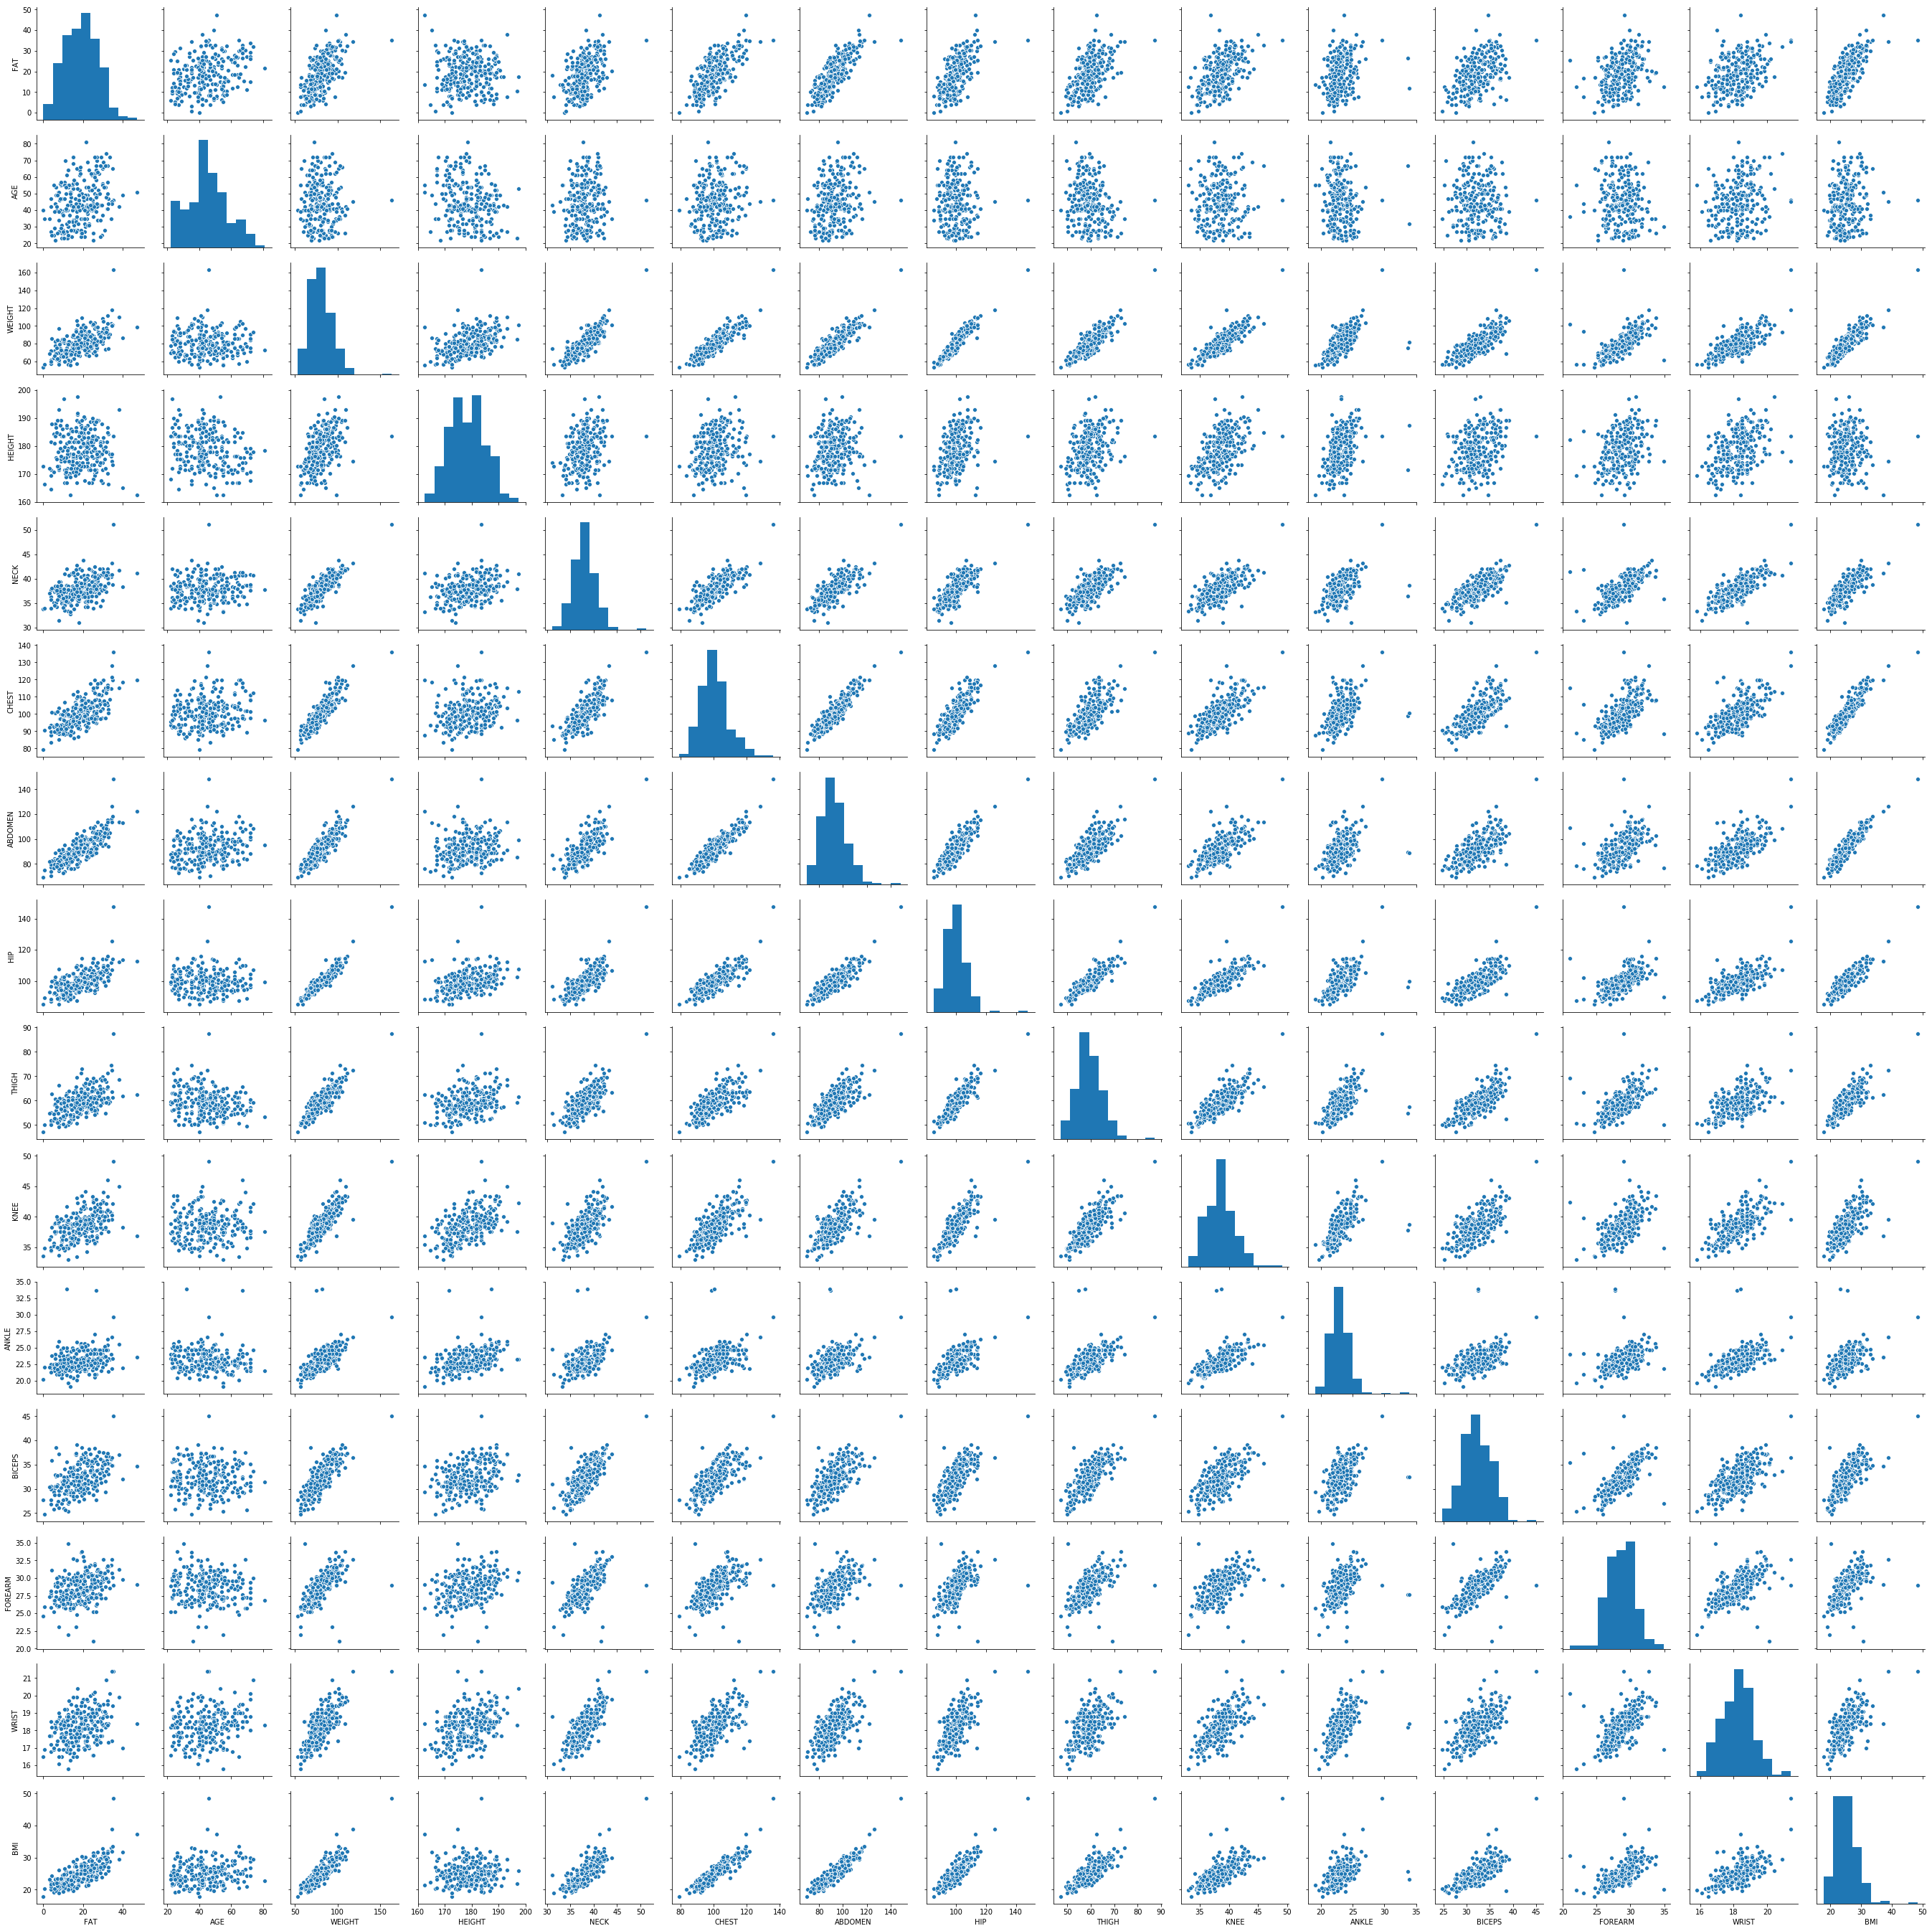

In [17]:
sns.pairplot(df)

**☞_WEIGHT와 선형성을 보이는 변수들이 많다.**

**☞_NECK과 선형성을 보이는 변수들이 많다.**

**☞_BMI와 선형성을 보이는 변수들이 많다.**

**☞☞☞_다중공선성이 의심된다.**

---
---
## 변수 간의 경향성 파악 - 상관관계 분석

In [196]:
df.corr().round(3)

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,BMI
FAT,1.000,0.289,0.597,-0.049,0.482,0.694,0.807,0.608,0.536,0.487,0.250,0.475,0.344,0.336,0.718
AGE,0.289,1.000,-0.022,-0.255,0.107,0.172,0.226,-0.059,-0.215,0.010,-0.111,-0.052,-0.094,0.209,0.110
WEIGHT,0.597,-0.022,1.000,0.479,0.830,0.892,0.884,0.942,0.866,0.849,0.608,0.795,0.622,0.728,0.885
HEIGHT,-0.049,-0.255,0.479,1.000,0.308,0.215,0.176,0.368,0.331,0.497,0.388,0.303,0.311,0.388,0.021
NECK,0.482,0.107,0.830,0.308,1.000,0.783,0.753,0.741,0.700,0.672,0.472,0.727,0.615,0.739,0.780
CHEST,0.694,0.172,0.892,0.215,0.783,1.000,0.914,0.828,0.723,0.712,0.473,0.724,0.569,0.656,0.908
ABDOMEN,0.807,0.226,0.884,0.176,0.753,0.914,1.000,0.871,0.759,0.728,0.443,0.677,0.491,0.617,0.920
HIP,0.608,-0.059,0.942,0.368,0.741,0.828,0.871,1.000,0.891,0.816,0.554,0.737,0.539,0.636,0.882
THIGH,0.536,-0.215,0.866,0.331,0.700,0.723,0.759,0.891,1.000,0.790,0.534,0.759,0.560,0.561,0.809
KNEE,0.487,0.010,0.849,0.497,0.672,0.712,0.728,0.816,0.790,1.000,0.607,0.672,0.547,0.667,0.700


**☞_FAT과 ABDOMEN 간의 높은 선형적 상관관계가 존재(0.813)**

**☞_FAT과 BMI 간의 높은 선형적 상관관계가 존재(0.726)**

**☞_FAT과 CHEST 간의 높은 선형적 상관관계가 존재(0.703)**

**☞_WEIGHT와 HIP 간의 높은 선형적 상관관계가 존재(0.944)**

**☞_CHEST와 ABDOMEN 간의 높은 선형적 상관관계가 존재(0.916)**

**☞_CHEST와 BMI 간의 높은 선형적 상관관계가 존재(0.910)**

**☞_ABDOMEN과 BMI 간의 높은 선형적 상관관계가 존재(0.922)**

---
---
## 회귀 모델 생성

In [129]:
reg_multi_model = sm.OLS(df_y,df_x_const)
reg_multi_results = reg_multi_model.fit()
print(reg_multi_results.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     49.33
Date:                Mon, 11 Feb 2019   Prob (F-statistic):           1.14e-61
Time:                        16:16:54   Log-Likelihood:                -705.71
No. Observations:                 249   AIC:                             1441.
Df Residuals:                     234   BIC:                             1494.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -136.2148     54.076     -2.519      0.0

**☞_분석 자료수 : 251, 잔차 자유도 : 236, 모델 자유도 : 14**

**☞_ANOVA 분석결과 : p값이 0.05보다 작으므로 회귀모델로서 유의하다.**

**☞_설명력 : 0.740 ==> 모델을 통하여 목표변수 FAT을 74% 설명할 수 있다.**

**☞_회귀계수 : CHEST와 KNEE, ABKLE, BICEPS의 p값이 0.05보다 크므로 계수로서 유의하지 않다.**

---
---
## 다중공선성 검토

In [130]:
ds_vif = pd.DataFrame()
ds_vif["variable"] = df_x_const.columns
ds_vif["VIF"] = [variance_inflation_factor(df_x_const.values, i) for i in range(df_x_const.shape[1])]
ds_vif.sort_values("VIF",inplace = True)
ds_vif.round(3)

,variable,VIF
10,ANKLE,1.921
12,FOREARM,2.214
1,AGE,2.287
13,WRIST,3.313
11,BICEPS,3.611
4,NECK,4.353
9,KNEE,4.742
8,THIGH,7.725
5,CHEST,10.683
6,ABDOMEN,13.007


**☞_WEIGHT와 BMI, HEIGHT의 VIF가 10보다 크므로 다중공선성 문제가 있는 것으로 보인다. 큰 영향이 없다면 모델에서 제외하는 것이 좋다.**

**☞_다중공선성 문제를 일으키는 변수를 제외해야 하는데, 일반적으로 다중공선성 문제를 일으키는 변수 중 종속변수와 상관관계가 높은 것을 남겨둔다.**

**☞_따라서 종속변수와 상관관계가 가장 낮은 HEIGHT를 제거한다.**

*다중공선성 문제를 일으키는 변수 제외
일반적으로 다중공선성 문제를 일으키는 변수 중 종속변수와 상관 관계가 높은 것을 남겨둔다. 
상관관계의 차이가 거의 없다면 해석이 용이한 설명변수를 남겨둔다. 
모형에 고려된 설명변수의 수가 적으면 제거하는 방법보다는 다른 방법을 사용한다.*

---
---
## HEIGHT 제외

In [131]:
df_d= df.drop("HEIGHT",axis=1)
df_d.head(10)

,FAT,AGE,WEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,BMI
0,35.2,46,163.4,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,48.5
1,11.8,27,75.6,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8,23.1
2,22.2,69,80.0,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8,26.4
3,10.6,57,66.5,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9,23.8
4,47.5,51,98.6,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4,37.3
5,24.2,40,91.0,38.5,106.5,100.9,106.2,63.5,39.9,22.6,35.1,30.6,19.0,28.8
6,23.3,52,75.2,37.5,102.7,91.0,98.9,57.1,36.7,22.3,31.6,27.5,17.9,25.4
7,26.0,54,103.5,42.5,119.9,110.4,105.5,64.2,42.7,27.0,38.4,32.0,19.6,30.7
8,9.0,47,82.9,37.3,99.6,88.8,101.4,57.4,39.6,24.6,30.3,27.9,17.8,23.2
9,4.0,47,57.4,34.0,83.4,70.4,87.2,50.6,34.4,21.9,26.8,25.8,16.8,20.0


In [132]:
df_y = df_d["FAT"]
df_x = df_d.drop("FAT",axis = 1, inplace = False)
print("목표변수 데이터 크기 : {}".format(df_y.shape))
print("설명변수 데이터 크기 : {}".format(df_x.shape))
df_x_const = sm.add_constant(df_x)
df_x_const.head()

목표변수 데이터 크기 : (249,)
설명변수 데이터 크기 : (249, 13)


,const,AGE,WEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,BMI
0,1.0,46,163.4,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,48.5
1,1.0,27,75.6,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8,23.1
2,1.0,69,80.0,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8,26.4
3,1.0,57,66.5,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9,23.8
4,1.0,51,98.6,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4,37.3


---
---
## 회귀 모델 생성

In [133]:
reg_multi_model = sm.OLS(df_y,df_x_const)
reg_multi_results = reg_multi_model.fit()
print(reg_multi_results.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     51.81
Date:                Mon, 11 Feb 2019   Prob (F-statistic):           1.88e-61
Time:                        16:17:12   Log-Likelihood:                -708.42
No. Observations:                 249   AIC:                             1445.
Df Residuals:                     235   BIC:                             1494.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -18.4574     15.156     -1.218      0.2

**☞_분석 자료수 : 251, 잔차 자유도 : 237, 모델 자유도 : 13**

**☞_ANOVA 분석결과 : p값이 0.05보다 작으므로 회귀모델로서 유의하다.**

**☞_설명력 : 0.733 ==> 모델을 통하여 목표변수 FAT을 73.3% 설명할 수 있다.**

**☞_회귀계수 : WEIGHT와 NECK, ABDOMEN, FOREARM, WRIST의 p값이 0.05보다 작으므로 계수로서 유의하다.**

---
---
## 다중공선성 검토

In [134]:
ds_vif = pd.DataFrame()
ds_vif["variable"] = df_x_const.columns
ds_vif["VIF"] = [variance_inflation_factor(df_x_const.values, i) for i in range(df_x_const.shape[1])]
ds_vif.sort_values("VIF",inplace = True)
ds_vif.round(3)

,variable,VIF
9,ANKLE,1.912
11,FOREARM,2.151
1,AGE,2.251
12,WRIST,3.292
10,BICEPS,3.594
3,NECK,4.338
8,KNEE,4.714
7,THIGH,7.659
4,CHEST,10.459
13,BMI,11.543


**☞_WEIGHT의 VIF가 10보다 크므로 다중공선성 문제가 있는 것으로 보인다. 큰 영향이 없다면 모델에서 제외하는 것이 좋다.**

**☞_WEIGHT를 제거한다.**

---
---
## WEIGHT 제외

In [197]:
df_d= df.drop("WEIGHT",axis=1)
df_d.head(10)

,FAT,AGE,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,BMI
0,35.2,46,183.5,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,48.5
1,11.8,27,181.0,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8,23.1
2,22.2,69,174.0,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8,26.4
3,10.6,57,167.0,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9,23.8
4,47.5,51,162.6,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4,37.3
5,24.2,40,177.8,38.5,106.5,100.9,106.2,63.5,39.9,22.6,35.1,30.6,19.0,28.8
6,23.3,52,172.1,37.5,102.7,91.0,98.9,57.1,36.7,22.3,31.6,27.5,17.9,25.4
7,26.0,54,183.5,42.5,119.9,110.4,105.5,64.2,42.7,27.0,38.4,32.0,19.6,30.7
8,9.0,47,189.2,37.3,99.6,88.8,101.4,57.4,39.6,24.6,30.3,27.9,17.8,23.2
9,4.0,47,169.5,34.0,83.4,70.4,87.2,50.6,34.4,21.9,26.8,25.8,16.8,20.0


In [198]:
df_y = df_d["FAT"]
df_x = df_d.drop("FAT",axis = 1, inplace = False)
print("목표변수 데이터 크기 : {}".format(df_y.shape))
print("설명변수 데이터 크기 : {}".format(df_x.shape))
df_x_const = sm.add_constant(df_x)
df_x_const.head()

목표변수 데이터 크기 : (249,)
설명변수 데이터 크기 : (249, 13)


,const,AGE,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,BMI
0,1.0,46,183.5,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,48.5
1,1.0,27,181.0,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8,23.1
2,1.0,69,174.0,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8,26.4
3,1.0,57,167.0,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9,23.8
4,1.0,51,162.6,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4,37.3


---
---
## 회귀 모델 생성

In [199]:
reg_multi_model = sm.OLS(df_y,df_x_const)
reg_multi_results = reg_multi_model.fit()
print(reg_multi_results.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     51.02
Date:                Mon, 11 Feb 2019   Prob (F-statistic):           7.12e-61
Time:                        16:40:49   Log-Likelihood:                -709.85
No. Observations:                 249   AIC:                             1448.
Df Residuals:                     235   BIC:                             1497.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.7485      9.020      1.524      0.1

**☞_분석 자료수 : 251, 잔차 자유도 : 238, 모델 자유도 : 12**

**☞_ANOVA 분석결과 : p값이 0.05보다 작으므로 회귀모델로서 유의하다.**

**☞_설명력 : 0.730 ==> 모델을 통하여 목표변수 FAT을 73% 설명할 수 있다.**

**☞_회귀계수 : AGE와 NECK, ABDOMEN, HIP, FOREARM, WRIST의 p값이 0.05보다 작으므로 계수로서 유의하다.**

---
---
## 다중공선성 검토

In [200]:
ds_vif = pd.DataFrame()
ds_vif["variable"] = df_x_const.columns
ds_vif["VIF"] = [variance_inflation_factor(df_x_const.values, i) for i in range(df_x_const.shape[1])]
ds_vif.sort_values("VIF",inplace = True)
ds_vif.round(3)

,variable,VIF
9,ANKLE,1.921
11,FOREARM,2.161
1,AGE,2.285
12,WRIST,3.313
10,BICEPS,3.558
3,NECK,4.243
8,KNEE,4.614
2,HEIGHT,5.904
7,THIGH,7.663
4,CHEST,10.682


**☞_HIP, BMI, ABDOMEN의 VIF가 10보다 크므로 다중공선성 문제가 있는 것으로 보이지만, 10보다 조금 크므로 포함시켜서 변수선택법을 진행한다.**

---
---
## 후진제거법을 이용한 변수 선택

In [201]:
model = LinearRegression()
rfe = RFE(estimator=model,n_features_to_select=6).fit(df_x,df_y)
selected_cols = df_x.columns[rfe.support_]
removed_cols = df_x.columns[~rfe.support_]
print("Selected Variables:{}".format(selected_cols))
print("Removed Variables:{}".format(removed_cols))

Selected Variables:Index(['NECK', 'ABDOMEN', 'HIP', 'FOREARM', 'WRIST', 'BMI'], dtype='object')
Removed Variables:Index(['AGE', 'HEIGHT', 'CHEST', 'THIGH', 'KNEE', 'ANKLE', 'BICEPS'], dtype='object')


**☞_NECK, ABDOMEN, HIP, FOREARM, WRIST 변수가 선택 되었다.**

---
---
## 회귀 모델 선택

In [202]:
df_x_rfe = sm.add_constant(df_x_const[selected_cols])
reg_multi_rfe_model = sm.OLS(df_y,df_x_rfe)
reg_multi_rfe_results = reg_multi_rfe_model.fit()
print(reg_multi_rfe_results.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     107.3
Date:                Mon, 11 Feb 2019   Prob (F-statistic):           2.51e-65
Time:                        16:41:00   Log-Likelihood:                -715.20
No. Observations:                 249   AIC:                             1444.
Df Residuals:                     242   BIC:                             1469.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.1183      7.050      1.293      0.1

**☞_분석 자료수 : 251, 잔차 자유도 : 245, 모델 자유도 : 5**

**☞_ANOVA 분석결과 : p값이 0.05보다 작으므로 회귀모델로서 유의하다.**

**☞_설명력 : 0.724 ==> 모델을 통하여 목표변수 FAT을 72.4% 설명할 수 있다.**

**☞_회귀계수 : 절편의 p값이 유의수준 0.05보다 크므로 계수로서 유의하지 않으나 절편은 유의하지 않더라도 회귀 모델에 포함한다.**

**☞_회귀계수 : 모든 설명 변수들이 유의하다.**

---
---
## 다중공선성 검토

In [31]:
ds_rfe_vif = pd.DataFrame()
ds_rfe_vif["variable"] = df_x_rfe.columns
ds_rfe_vif["VIF"] = [variance_inflation_factor(df_x_rfe.values, i) for i in range(df_x_rfe.shape[1])]
ds_rfe_vif.sort_values("VIF",inplace = True)
ds_rfe_vif.round(3)

,variable,VIF
4,FOREARM,1.769
5,WRIST,2.443
1,NECK,3.602
3,HIP,4.778
2,ABDOMEN,4.803
0,const,507.331


**☞_다중공선성의 문제가 없다.**

---
---
## 최종 회귀식

\begin{align}
\ Y = 2.5851 - 0.5720 NECK + 0.9771 ABDOMEN - 0.3537 HIP + 0.4080 FOREARM - 1.5647 WRIST
\end{align}

---
---
## 설명변수 중요도 그래프(표준화 적용 이전)

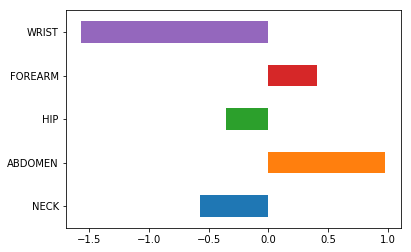

In [32]:
ds_reg_coef = pd.DataFrame({"Coef":reg_multi_rfe_results.params.values[1:]}, index=reg_multi_rfe_model.exog_names[1:])
ds_reg_coef.plot.barh(y="Coef",legend = False)

**☞_WRIST가 얇을 수록 체질 비만도가 높으며, ABDOMEN이 커질수록 체질 비만도가 높아진다.**

---
---
## 표준화 회귀계수를 이용한 변수 중요도 확인

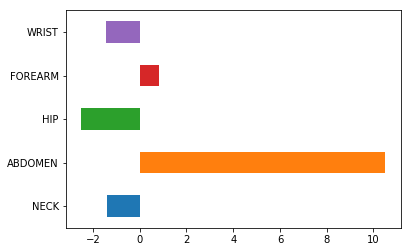

In [33]:
df_x_scaled = scale(df_x_const[selected_cols])
df_x_scaled = sm.add_constant(df_x_scaled)
reg_multi_scaled_model = sm.OLS(df_y, df_x_scaled)
reg_multi_scaled_results = reg_multi_scaled_model.fit()
df_reg_scaled_coef = pd.DataFrame({"Coef":reg_multi_scaled_results.params.values[1:]}, index=reg_multi_rfe_model.exog_names[1:])
df_reg_scaled_coef.plot.barh(y="Coef",legend = False)

**☞_회귀계수의 방향은 동일하나 중요도 크기가 변했다. ABDOMEN이 가장 중요하고, WRIST의 중요도는 줄어든 반면, HIP변수의 중요도는 증가했다.**